숫자 feature에 대한 pairplot + 상관관계 추정

In [1]:
import warnings
warnings.filterwarnings(action="ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_insfluence import variance_inflation_factor

In [2]:
train_df = pd.read_parquet("../../train.parquet").drop(columns="SAMPLE_ID")

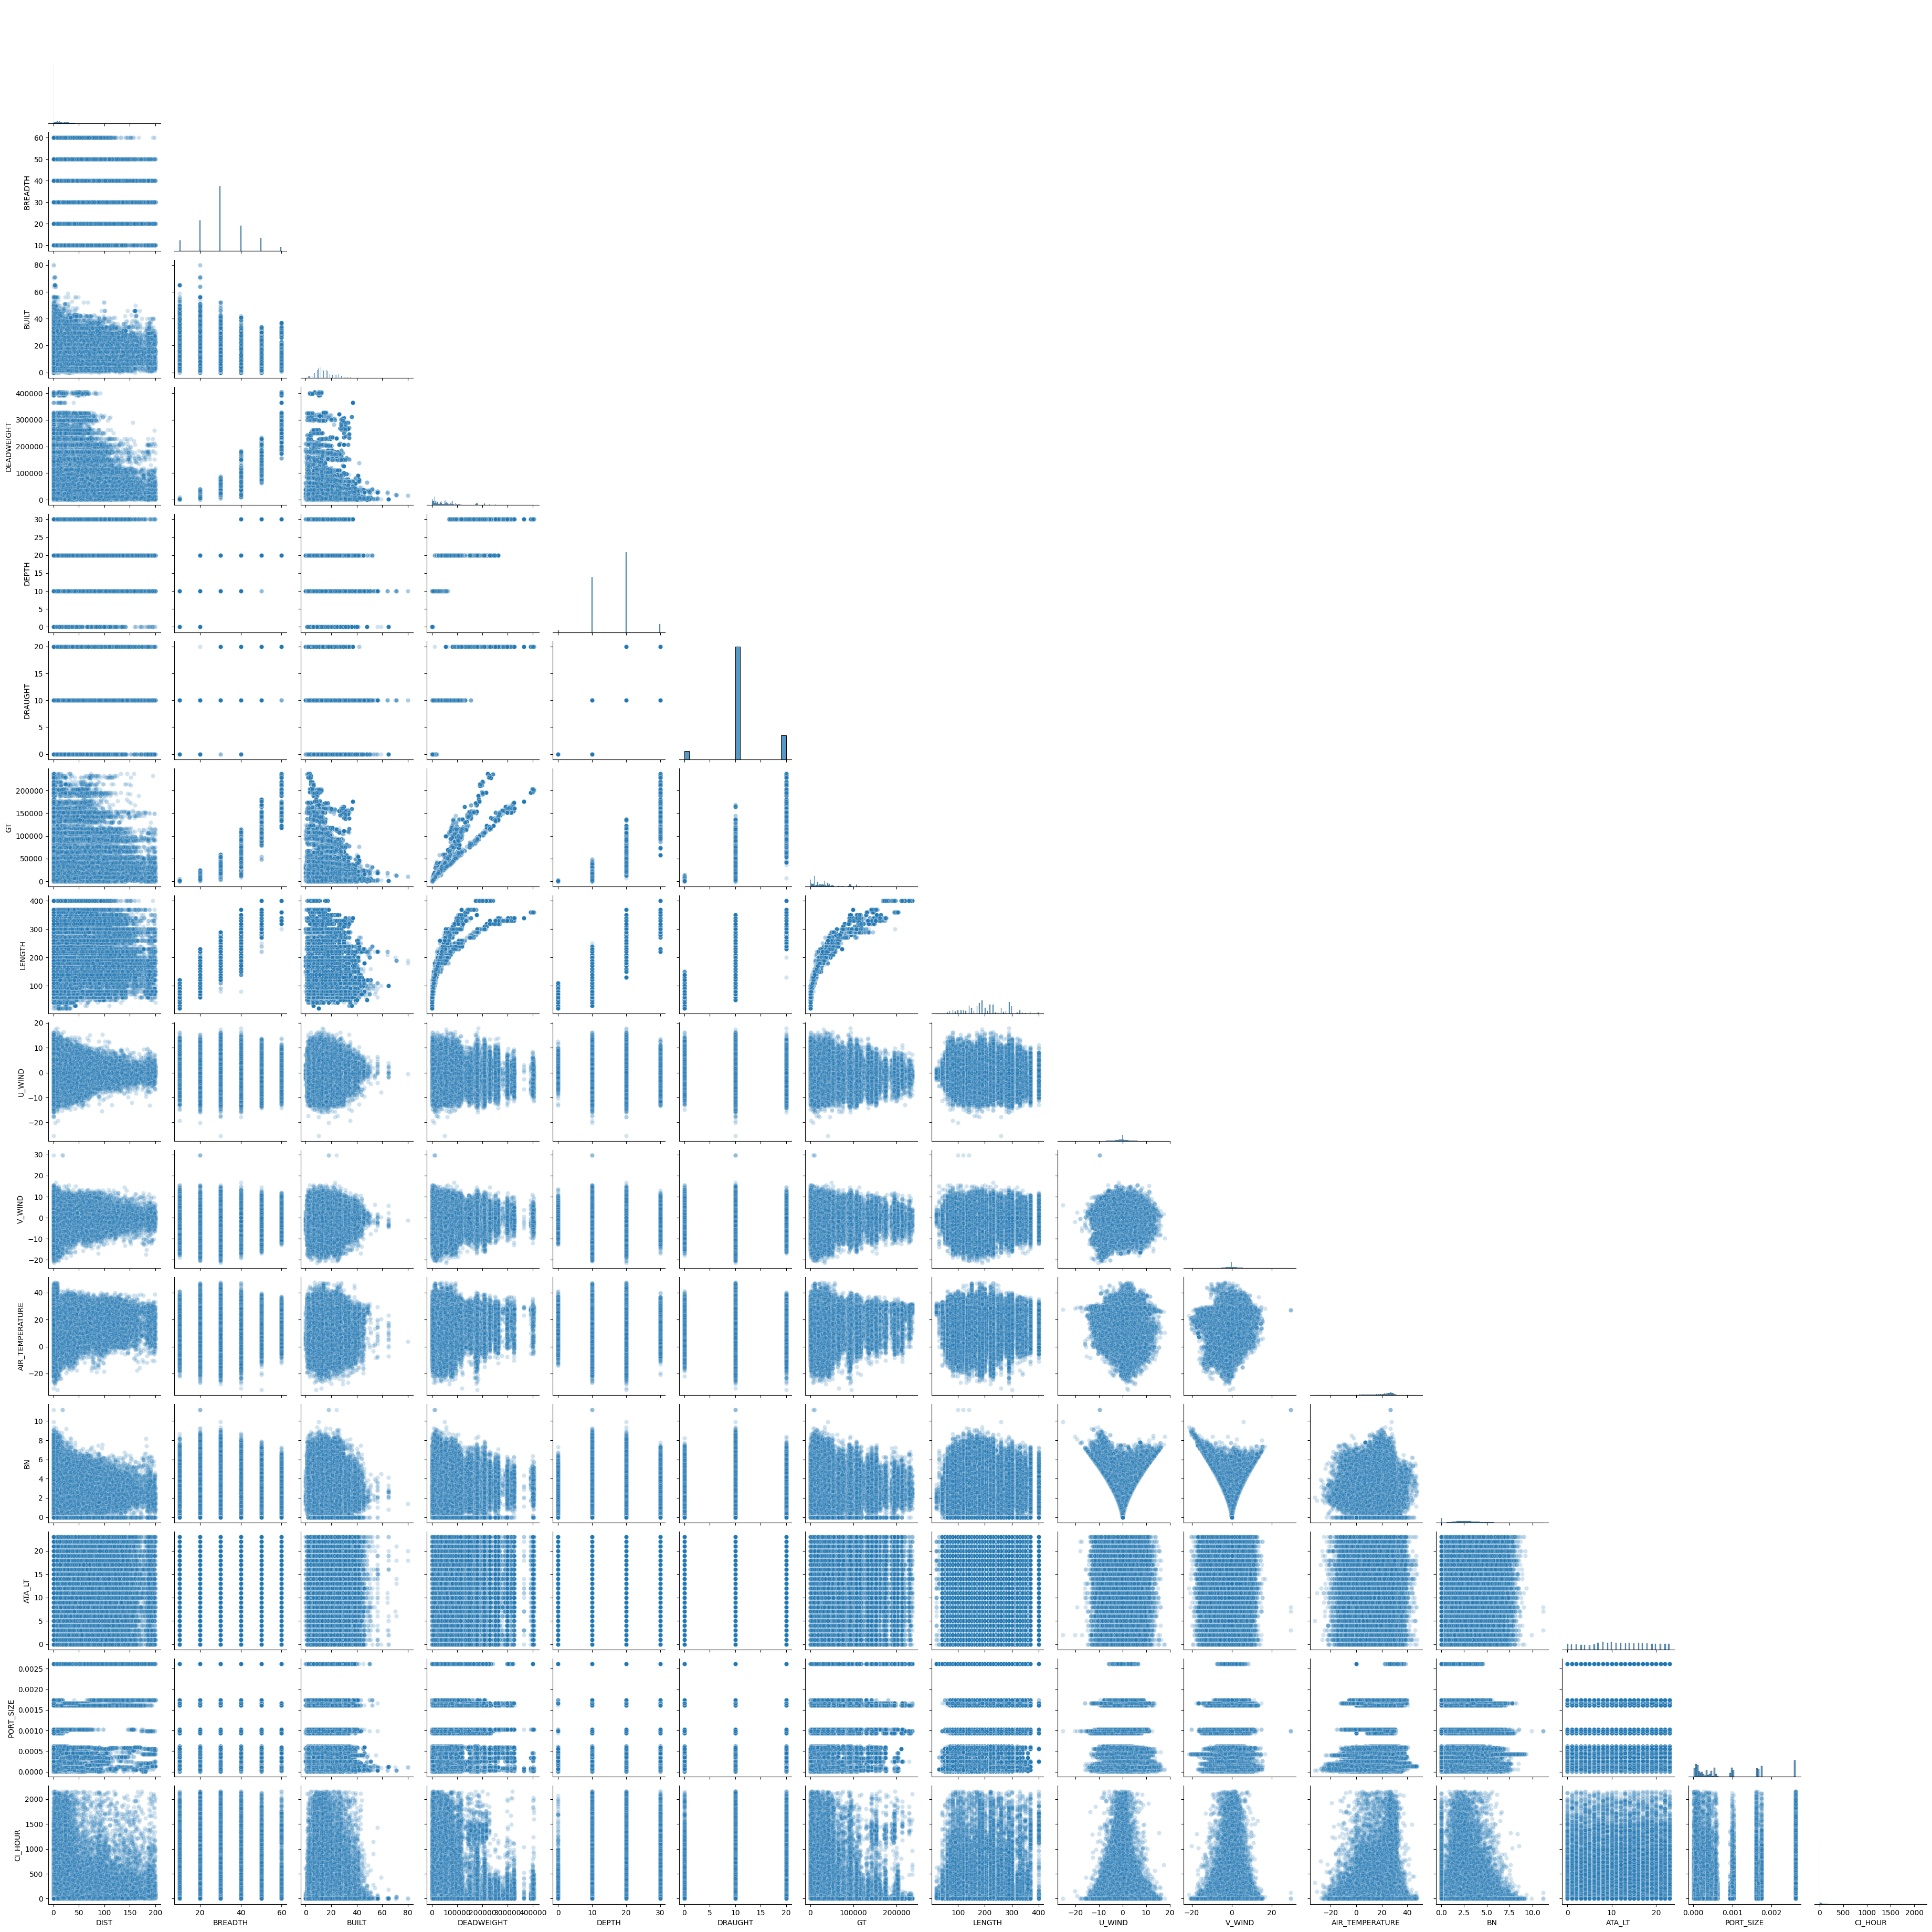

In [11]:
sns.pairplot(train_df, corner=True, plot_kws={"alpha": 0.2})
plt.show()

In [3]:
df = train_df[["BREADTH", "DEADWEIGHT", "DEPTH", "DRAUGHT", "GT", "LENGTH", "BUILT", "U_WIND", "V_WIND", "AIR_TEMPERATURE", "BN", "ATA_LT", "PORT_SIZE", "CI_HOUR"]]
cor_df = df.corr()
high_corr = cor_df[abs(cor_df) > 0.5]
high_corr[high_corr == 1] = np.nan
high_corr



BREADTH  DEADWEIGHT     DEPTH   DRAUGHT        GT    LENGTH  \
BREADTH               NaN    0.857126  0.790476  0.761323  0.903984  0.920652   
DEADWEIGHT       0.857126         NaN  0.712969  0.813401  0.925143  0.826766   
DEPTH            0.790476    0.712969       NaN  0.581056  0.787595  0.842638   
DRAUGHT          0.761323    0.813401  0.581056       NaN  0.779028  0.737606   
GT               0.903984    0.925143  0.787595  0.779028       NaN  0.916684   
LENGTH           0.920652    0.826766  0.842638  0.737606  0.916684       NaN   
BUILT                 NaN         NaN       NaN       NaN       NaN       NaN   
U_WIND                NaN         NaN       NaN       NaN       NaN       NaN   
V_WIND                NaN         NaN       NaN       NaN       NaN       NaN   
AIR_TEMPERATURE       NaN         NaN       NaN       NaN       NaN       NaN   
BN                    NaN         NaN       NaN       NaN       NaN       NaN   
ATA_LT                NaN         NaN       NaN       NaN       NaN       NaN   
PORT_SIZE             NaN         NaN       NaN       NaN       NaN       NaN   
CI_HOUR               NaN         NaN       NaN       NaN       NaN       NaN   

                 BUILT  U_WIND  V_WIND  AIR_TEMPERATURE  BN  ATA_LT  \
BREADTH            NaN     NaN     NaN              NaN NaN     NaN   
DEADWEIGHT         NaN     NaN     NaN              NaN NaN     NaN   
DEPTH              NaN     NaN     NaN              NaN NaN     NaN   
DRAUGHT            NaN     NaN     NaN              NaN NaN     NaN   
GT                 NaN     NaN     NaN              NaN NaN     NaN   
LENGTH             NaN     NaN     NaN              NaN NaN     NaN   
BUILT              NaN     NaN     NaN              NaN NaN     NaN   
U_WIND             NaN     NaN     NaN              NaN NaN     NaN   
V_WIND             NaN     NaN     NaN              NaN NaN     NaN   
AIR_TEMPERATURE    NaN     NaN     NaN              NaN NaN     NaN   
BN                 NaN     NaN     NaN              NaN NaN     NaN   
ATA_LT             NaN     NaN     NaN              NaN NaN     NaN   
PORT_SIZE          NaN     NaN     NaN              NaN NaN     NaN   
CI_HOUR            NaN     NaN     NaN              NaN NaN     NaN   

                 PORT_SIZE  CI_HOUR  
BREADTH                NaN      NaN  
DEADWEIGHT             NaN      NaN  
DEPTH                  NaN      NaN  
DRAUGHT                NaN      NaN  
GT                     NaN      NaN  
LENGTH                 NaN      NaN  
BUILT                  NaN      NaN  
U_WIND                 NaN      NaN  
V_WIND                 NaN      NaN  
AIR_TEMPERATURE        NaN      NaN  
BN                     NaN      NaN  
ATA_LT                 NaN      NaN  
PORT_SIZE              NaN      NaN  
CI_HOUR                NaN      NaN

In [4]:
import pandas as pd
import numpy as np
from ipywidgets import interact, widgets
from IPython.display import display

# 예시 데이터 (대체해주세요)
# df = ...

def display_corr(threshold=0.5):
    cor_df = df.corr()
    high_corr = cor_df[abs(cor_df) > threshold]
    high_corr[high_corr == 1] = np.nan
    display(high_corr)

interact(display_corr, threshold=(0, 1, 0.01));


interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

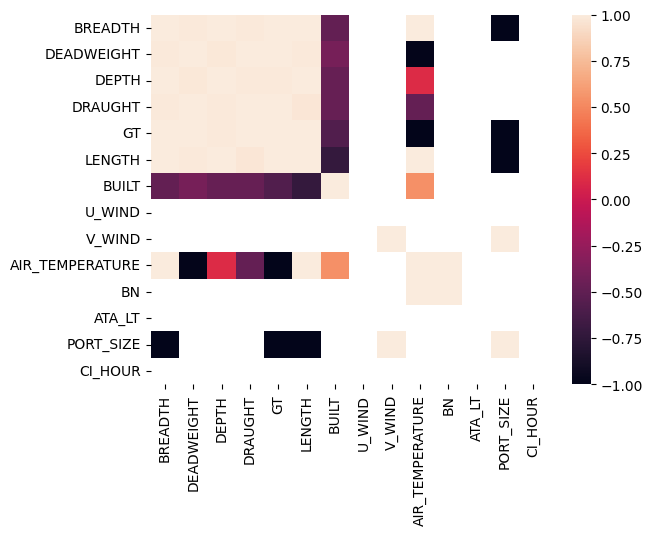

In [28]:
sns.heatmap(high_corr.corr())
plt.show()

In [8]:
# drop : "U_WIND", "V_WIND", "AIR_TEMPERATURE"
# df = train_df[["BREADTH", "BUILT", "DEADWEIGHT", "DEPTH", "DRAUGHT", "GT", "LENGTH", "BN", "ATA_LT", "PORT_SIZE", "CI_HOUR"]]
df = train_df[["ATA_LT", "PORT_SIZE", "CI_HOUR"]]
df.fillna(df.mean(), inplace=True)
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["Features"] = df.columns
vif

VIF_Factor   Features
0    1.710417     ATA_LT
1    1.672078  PORT_SIZE
2    1.107622    CI_HOUR